In [1]:
import pandas as pd
import numpy as np

In [2]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.
C:\Users\UMANG\.conda\envs\temsorflowkeras36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\UMANG\.conda\envs\temsorflowkeras36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\UMANG\.conda\envs\temsorflowkeras36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\UMANG\.cond

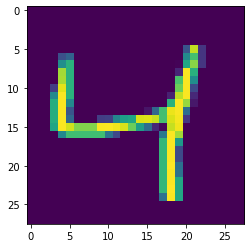

In [3]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[2])

In [4]:
#check image shape
X_train[0].shape

(28, 28)

In [5]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [6]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [8]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 18s 301us/step - loss: 0.2491 - accuracy: 0.9499 - val_loss: 0.0785 - val_accuracy: 0.9748
Epoch 2/5
60000/60000 [==============================] - 16s 268us/step - loss: 0.0672 - accuracy: 0.9796 - val_loss: 0.0730 - val_accuracy: 0.9784
Epoch 3/5
60000/60000 [==============================] - 16s 270us/step - loss: 0.0504 - accuracy: 0.9841 - val_loss: 0.0889 - val_accuracy: 0.9732
Epoch 4/5
60000/60000 [==============================] - 15s 257us/step - loss: 0.0374 - accuracy: 0.9879 - val_loss: 0.0841 - val_accuracy: 0.9776
Epoch 5/5
60000/60000 [==============================] - 16s 271us/step - loss: 0.0286 - accuracy: 0.9911 - val_loss: 0.0957 - val_accuracy: 0.9784


In [10]:
#predict first 9 images in the test set
model.predict(X_test[:9])

array([[2.6394917e-12, 6.4601214e-19, 4.9128968e-11, 6.7504811e-09,
        1.4343688e-16, 4.5855370e-15, 2.3123193e-19, 1.0000000e+00,
        1.1630490e-11, 1.8177062e-09],
       [4.7588458e-15, 9.3510926e-14, 1.0000000e+00, 4.9487026e-14,
        1.6649674e-19, 1.0108553e-20, 2.7723175e-08, 2.3612355e-21,
        1.0399521e-12, 8.3672122e-23],
       [5.9770772e-10, 9.9999964e-01, 6.4688570e-09, 7.5868495e-15,
        3.2657726e-07, 1.4360713e-08, 3.1108722e-14, 1.6228108e-10,
        4.7457178e-08, 1.6714356e-15],
       [9.9999988e-01, 1.1753091e-19, 9.1250933e-13, 5.4413215e-17,
        3.5955362e-12, 1.0387224e-13, 8.6146462e-10, 2.8670089e-13,
        5.0342560e-12, 6.1173338e-08],
       [2.2347311e-13, 3.0280176e-13, 9.5121426e-13, 6.1078716e-12,
        9.9998176e-01, 1.6881291e-16, 2.5931887e-17, 2.2949910e-12,
        4.8112074e-12, 1.8263423e-05],
       [2.9940048e-13, 9.9999988e-01, 3.0007409e-12, 3.6510603e-14,
        1.4793701e-08, 1.3152287e-13, 3.0139194e-14, 7.83

In [12]:
#actual results for first 9 images in test set
y_test[:9]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)